In [187]:
import pandas as pd

In [188]:
data = pd.read_csv('titanic_train.csv')
data_copy = data.copy()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [189]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Deleting Points with missing values

In [190]:
data['Age'].head(6)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
Name: Age, dtype: float64

Dropping all rows with missing values

In [191]:
data_del = data.dropna(axis=0)
data_del['Age'].head(6)

1     38.0
3     35.0
6     54.0
10     4.0
11    58.0
21    34.0
Name: Age, dtype: float64

In [192]:
data.shape, data_del.shape

((891, 12), (183, 12))

1) Significant loss of information <br> 
2) Only Three columns with missing values

Deleting columns with missing values

In [193]:
# Let us look at the ratio of missing values in columns

data.isna().sum()/(891)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Embarked and age column have very less number of missing values 

In [194]:
# dropping all the columns having missing values

del_data = data.dropna(thresh = 500, axis=1)
del_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [195]:
data.shape, del_data.shape

((891, 12), (891, 11))

Replacing missing values with a new category/value

In [196]:
data.Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [197]:
data.Cabin.fillna(value='missing')

0      missing
1          C85
2      missing
3         C123
4      missing
        ...   
886    missing
887        B42
888    missing
889       C148
890    missing
Name: Cabin, Length: 891, dtype: object

In [198]:
data.Age.tail()

886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, dtype: float64

In [199]:
data.Age.fillna(value=999)

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
       ...  
886     27.0
887     19.0
888    999.0
889     26.0
890     32.0
Name: Age, Length: 891, dtype: float64

In [200]:
# Replacing a column

In [201]:
data_replace = data.copy()


In [202]:
data['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [203]:
data.Cabin.isnull().head()

0     True
1    False
2     True
3    False
4     True
Name: Cabin, dtype: bool

In [204]:
data.Cabin.isnull().astype('int').head()

0    1
1    0
2    1
3    0
4    1
Name: Cabin, dtype: int32

In [205]:
data_replace['Cabin_present'] = data_replace.Cabin.isnull().astype('int')
data_replace.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_present
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Imputing Missing Values

In [206]:
data_copy.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [207]:
def process_title(x):
    if 'Mr.' in x:
        return 'Mr'
    elif 'Mrs.' in x:
        return 'Mrs'
    elif 'Master.' in x:
        return 'Master'
    elif 'Miss.' in x:
        return 'Miss'

In [208]:
data_copy['Title'] = data_copy.Name.apply(lambda x: process_title(x))

In [209]:
data_copy.Title.head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [210]:
mean_Mr = data_copy.loc[data_copy.Title == 'Mr', 'Age'].mean()
mean_Mrs = data_copy.loc[data_copy.Title == 'Mrs', 'Age'].mean()
mean_Miss = data_copy.loc[data_copy.Title == 'Miss', 'Age'].mean()
mean_Master = data_copy.loc[data_copy.Title == 'Master', 'Age'].mean()

In [211]:
data_copy.loc[data_copy.Title == 'Mr', 'Age'] = data_copy.loc[data_copy.Title == 'Mr', 'Age'].fillna(mean_Mr)
data_copy.loc[data_copy.Title == 'Mrs', 'Age'] = data_copy.loc[data_copy.Title == 'Mrs', 'Age'].fillna(mean_Mrs)
data_copy.loc[data_copy.Title == 'Miss', 'Age'] = data_copy.loc[data_copy.Title == 'Miss', 'Age'].fillna(mean_Miss)
data_copy.loc[data_copy.Title == 'Master', 'Age'] = data_copy.loc[data_copy.Title == 'Master', 'Age'].fillna(mean_Master)

In [212]:
data_copy.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              1
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title           27
dtype: int64

In [213]:
data_copy.loc[data_copy.Age.isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C,None


In [214]:
data.loc[data_copy.PassengerId == 767, 'Age'] = mean_Mr

Working with Categorical Variables

In [215]:
data_copy.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
dtype: object

In [216]:
categorical = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
data_copy[categorical].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

One Hot Encoding

In [217]:
# since unique counts in the categories like Sex, Embarked are very less they can be one hot encoded

In [218]:
pd.get_dummies(data_copy['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [219]:
data_cleaned = data_copy.drop(['Name', 'Ticket', 'Cabin', 'Title'], axis = 1)
data_cleaned = pd.get_dummies(data_cleaned)
data_cleaned.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


Label Encoding

In [220]:
data_copy.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [236]:
data_copy = data.copy()
data_copy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,715.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.702850,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.516664,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.250000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Dealing with Outliers present in the Fare variable

In [237]:
Q1 = data.Fare.quantile(0.25)
Q2 = data.Fare.quantile(0.75)
Q1, Q2

(7.9104, 31.0)

In [238]:
IQR = Q2 - Q1
IQR

23.0896

In [239]:
whisker_low = Q1 - 1.5*IQR
whisker_high = Q2 + 1.5*IQR
whisker_low, whisker_high

(-26.724, 65.6344)

In [241]:
data_copy.loc[ data_copy.Fare > 66 ]  = whisker_high
data_copy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,730.000000,891.000000,891.000000,891.000000
mean,396.311549,8.840169,10.702122,34.781108,8.925466,8.841291,24.046813
std,274.275473,21.989427,21.275253,18.799359,21.968002,21.996766,20.481625
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,117.500000,0.000000,2.000000,21.250000,0.000000,0.000000,7.910400
50%,385.000000,0.000000,3.000000,30.250000,0.000000,0.000000,14.454200
75%,635.500000,1.000000,3.000000,47.000000,1.000000,1.000000,31.000000
max,891.000000,65.634400,65.634400,80.000000,65.634400,65.634400,65.634400


In [254]:
# there are also fares with value zero let us deal with that

In [255]:
data_copy.loc[ data_copy.Fare < Q1 ] = Q1 

Transforming Variables

In [256]:
import seaborn as sns
import numpy as np

<AxesSubplot:xlabel='Fare', ylabel='Density'>

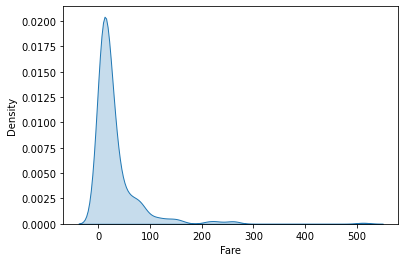

In [262]:
sns.kdeplot(data.Fare, shade = True)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

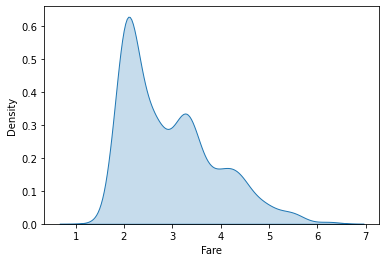

In [265]:
sns.kdeplot(np.log(data.loc[data.Fare > 0, 'Fare']), shade = True)